# 01 - Tutorial: Data preprocessing pipeline for model training

## 0 - Directory set-up
First of all make sure that your current directory is set to "/dance-bits". Below are a few lines that will help you navigate there.

In [21]:
!ls

config	LICENSE  notebooks    requirements.txt	test.py
data	main.py  __pycache__  src		tests
docs	models	 README.md    test_model.py	THIRD-PARTY-NOTICES


If that is not the case, uncomment the cell below and use the terminal to navigate to the proper directory.

In [22]:
#%cd ..

Check the current directory.

In [23]:
!ls

config	LICENSE  notebooks    requirements.txt	test.py
data	main.py  __pycache__  src		tests
docs	models	 README.md    test_model.py	THIRD-PARTY-NOTICES


The current destination must have similar contents as the ones below:

```
config	LICENSE  notebooks    requirements.txt	test.py
data	main.py  __pycache__  src		tests
docs	models	 README.md    test_model.py	THIRD-PARTY-NOTICES
```

If that is the case, comment the terminal navigation cell above `#%cd ..`, so that you do not change the current directory.

## 1 - Required inputs, libraries and imports

In [24]:
import os

from src.data import CustomDataset
from src.data import preprocess_videos
from src.data import preprocess_audios
from src.data import preprocess_labels
from src.data import merge_dataset


# REQUIRED INPUT

# 1. Existing file locations
LABELS_FILE_NAME = "labels.csv"
ALL_LABELS_PATH = "data/raw/video/dataset_X/"+LABELS_FILE_NAME
ALL_FILES_DIR = "data/raw/video/dataset_X"
NEW_DATASET_ID = "test_dataset_X"
TEST_FILES = [
        "gJS_sFM_c01_d03_mJS2_ch03.mp4",
        "gHO_sFM_c01_d20_mHO1_ch09.mp4"
    ]


# 2. Processing directories
dataset_path = f"data/raw/video/{NEW_DATASET_ID}"
output_csv_dir = f"data/interim/video_keypoints/{NEW_DATASET_ID}"
audio_folder = f"data/interim/audio_spectrograms/{NEW_DATASET_ID}"
save_dir = f"data/processed/{NEW_DATASET_ID}"

## 2 - Training data pipeline

### Step 1: Create a CustomDataset with a subset of videos.
Usually a training dataset is a folder with videos and with a labels.csv file that contains the labels for all of the videos in the dataset folder.

#### Goal:
 Create a dataset as a subset of the main folder
 
#### Input:
- the directory where all videos ([list of names.mp4]) and their labels (one csv file) are stored.

#### Output:
New folder with copied videos and labels in an appropriate schema.

The schema in the new labels.csv changes from 

```
URL,Annotator ID,Segmentation Points (sec),,,,,,,,,,,,,,
https://aistdancedb.ongaaccel.jp/v1.0.0/video/10M/gBR_sBM_c01_d04_mBR0_ch01.mp4,P0,0.7743,2.2743,3.7743,5.2743,6.7743,8.2743,9.7743,,,,,,,,
https://aistdancedb.ongaaccel.jp/v1.0.0/video/10M/gBR_sBM_c01_d04_mBR0_ch01.mp4,P1,1.1493,2.6493,4.1493,5.6493,7.1493,8.6493,10.1493,,,,,,,,
```
 to
```
 |
 |
 |
 v
file_name,annotator_id,labels
gHO_sFM_c01_d20_mHO1_ch09.mp4,P0,"[1.0681, 2.1116, 3.1551, 4.1986, 5.2421, 6.2855, 8.3725, 10.4595, 12.0247, 13.5899, 14.6334, 15.6768, 16.7203, 17.7638, 18.8073, 19.8508, 20.8942, 21.9377, 22.9812, 24.0247, 25.0681, 26.1116, 27.1551, 29.2421, 31.329, 32.3725]"
gHO_sFM_c01_d20_mHO1_ch09.mp4,P3,"[3.9377, 6.0247, 8.1116, 12.0247, 14.3725, 16.4595, 18.5464, 21.6768, 23.7638, 27.1551, 31.0681]```

In [25]:
# Create CustomDataset instance
dataset = CustomDataset(
            new_dataset_id=NEW_DATASET_ID,
            all_labels_path=ALL_LABELS_PATH,
            all_files_dir=ALL_FILES_DIR,
            file_names=TEST_FILES
        )
        

- Exported custom labels to data/raw/video/test_dataset_X. 

There are 2 .mp4 files in the export directory. These will not be copied again.
- Copied 0/2 Labelled mp4 files.

 - Skipped 2/2 mp4 files since they were already there.


### Step 2: Video and audio preprocessing

In [26]:
preprocess_videos(
            input_video_dir=dataset_path,
            output_csv_dir=output_csv_dir,
            output_video_dir=None,
            use_parallel=False
        )

Found 4 already processed files. These titles will be ignored.


0it [00:00, ?it/s]


In [27]:
preprocess_audios(
            video_folder=dataset_path,
            audio_folder=audio_folder
        )

Found 4 already processed files. These titles will be ignored.


  0%|          | 0/2 [00:00<?, ?it/s]

Processing: data/raw/video/test_dataset_X/gHO_sFM_c01_d20_mHO1_ch09.mp4
Processing video: data/raw/video/test_dataset_X/gHO_sFM_c01_d20_mHO1_ch09.mp4


  0%|          | 0/2 [00:00<?, ?it/s]

MoviePy - Writing audio in data/interim/audio_spectrograms/test_dataset_X/gHO_sFM_c01_d20_mHO1_ch09.wav


  0%|          | 0/2 [00:00<?, ?it/s]

MoviePy - Done.
Extracted audio from data/raw/video/test_dataset_X/gHO_sFM_c01_d20_mHO1_ch09.mp4 and saved it to data/interim/audio_spectrograms/test_dataset_X/gHO_sFM_c01_d20_mHO1_ch09.wav.


 50%|█████     | 1/2 [00:01<00:01,  1.42s/it]

Deleted the audio file under data/interim/audio_spectrograms/test_dataset_X/gHO_sFM_c01_d20_mHO1_ch09.wav
Audio preprocessing for data/raw/video/test_dataset_X/gHO_sFM_c01_d20_mHO1_ch09.mp4 completed.
Processing: data/raw/video/test_dataset_X/gJS_sFM_c01_d03_mJS2_ch03.mp4
Processing video: data/raw/video/test_dataset_X/gJS_sFM_c01_d03_mJS2_ch03.mp4
MoviePy - Writing audio in data/interim/audio_spectrograms/test_dataset_X/gJS_sFM_c01_d03_mJS2_ch03.wav


 50%|█████     | 1/2 [00:02<00:01,  1.42s/it]

MoviePy - Done.
Extracted audio from data/raw/video/test_dataset_X/gJS_sFM_c01_d03_mJS2_ch03.mp4 and saved it to data/interim/audio_spectrograms/test_dataset_X/gJS_sFM_c01_d03_mJS2_ch03.wav.


100%|██████████| 2/2 [00:03<00:00,  1.51s/it]

Deleted the audio file under data/interim/audio_spectrograms/test_dataset_X/gJS_sFM_c01_d03_mJS2_ch03.wav
Audio preprocessing for data/raw/video/test_dataset_X/gJS_sFM_c01_d03_mJS2_ch03.mp4 completed.


### Step 3: Transform labelled segments from annotators into a ground truth probability vector

Running to LabelProcessor for file gJS_sFM_c01_d03_mJS2_ch03.mp4.

Labels for file: gJS_sFM_c01_d03_mJS2_ch03.mp4

P0: [4.8243, 7.2243, 9.6243, 12.0243, 13.2243, 14.4243, 16.8243, 18.9243, 21.6243, 22.8243, 24.0243, 26.4243, 28.8243, 31.2243, 32.1243, 33.6243, 36.0243]
P7: [4.8243, 9.0243, 13.8243, 18.3243, 21.3243, 24.0243, 25.8243, 30.6243, 35.4243]
P8: [4.5243, 7.2243, 9.0243, 14.1243, 16.5243, 20.1243, 22.5243, 24.0243, 25.8243, 28.2243, 31.2243, 33.3243, 35.4243]




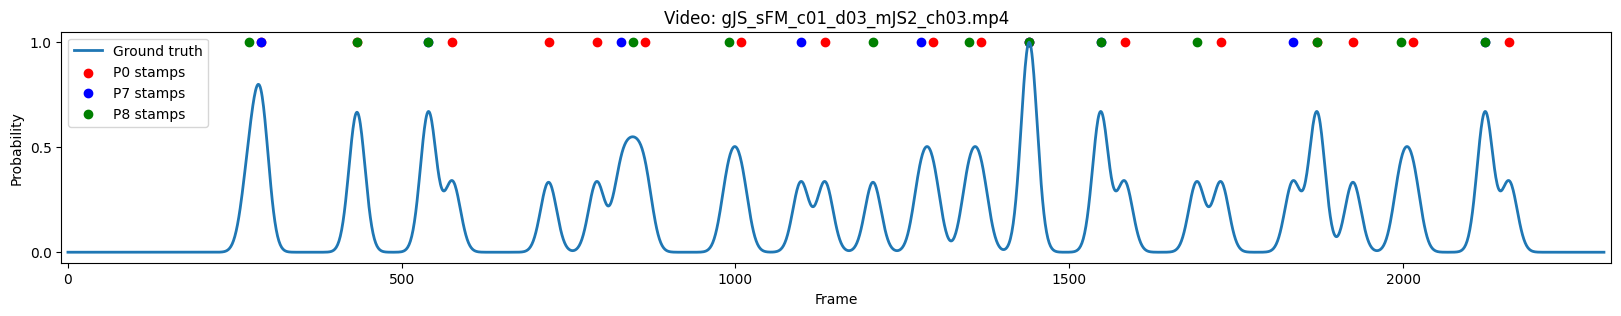

Running to LabelProcessor for file gHO_sFM_c01_d20_mHO1_ch09.mp4.

Labels for file: gHO_sFM_c01_d20_mHO1_ch09.mp4

P0: [1.0681, 2.1116, 3.1551, 4.1986, 5.2421, 6.2855, 8.3725, 10.4595, 12.0247, 13.5899, 14.6334, 15.6768, 16.7203, 17.7638, 18.8073, 19.8508, 20.8942, 21.9377, 22.9812, 24.0247, 25.0681, 26.1116, 27.1551, 29.2421, 31.329, 32.3725]
P3: [3.9377, 6.0247, 8.1116, 12.0247, 14.3725, 16.4595, 18.5464, 21.6768, 23.7638, 27.1551, 31.0681]
P4: [1.8508, 3.9377, 6.0247, 8.1116, 10.1986, 12.2855, 14.3725, 16.4595, 18.5464, 20.6334, 21.416, 22.7203, 24.8073, 26.8942, 28.9812, 31.329]




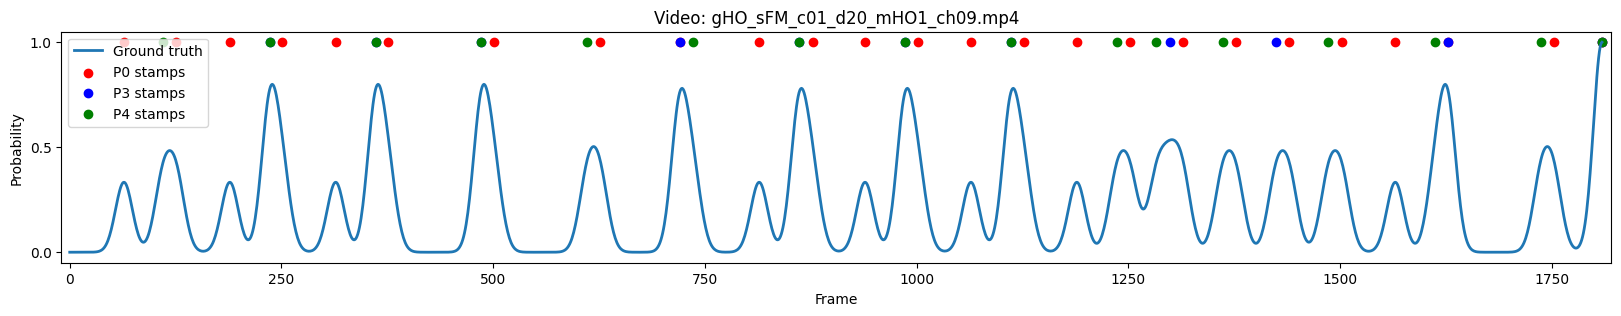

In [28]:
video_names, frame_stamps, prob_distr = preprocess_labels(
            labels_file_name=LABELS_FILE_NAME,
            audio_path=audio_folder,
            input_video_dir=dataset_path,
            video_names=TEST_FILES,
            to_plot=True
        )


### Step 4: Merge bonevectors, mel-spectrograms, and labels into one tensor for each file

In [29]:
merge_dataset(
            input_video_dir=dataset_path,
            output_csv_dir=output_csv_dir,
            audio_folder=audio_folder,
            save_dir=save_dir)

Ignoring files set for titles: ['gHO_sFM_c01_d20_mHO1_ch09', 'gJS_sFM_c01_d03_mJS2_ch03']
Already merged 2 files will also be ignored.
0


0it [00:00, ?it/s]
